In [48]:
import numpy as np
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [49]:
"""
You will implement linear regression with one variable to predict profits for a food truck. 
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. 
The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.
"""

'\nYou will implement linear regression with one variable to predict profits for a food truck. \nSuppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. \nThe chain already has trucks in various cities and you have data for profits and populations from the cities.\nYou would like to use this data to help you select which city to expand to next.\n'

In [50]:
# 单变量线性回归
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
path = '/Users/tangchencheng/Desktop/Data/pyData/ML_data_sets/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [52]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


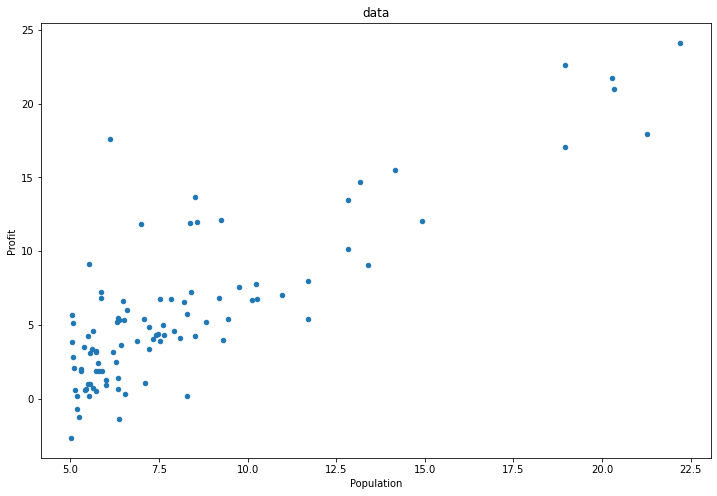

In [53]:
# 看看数据长什么样子
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8), title='data')
plt.show()

## 代价函数

![](img/cost.png)

In [54]:
# 定义代价函数，使用梯度下降来实现线性回归，以最小化成本函数
def computeCost(X, y, theta):
    """
    作用：计算代价函数，向量化
    param X: 输入矩阵
    param y: 输出目标
    param theta: parameters参数
    return
    """
    # np.power(a,b)
    # 若b为单个数字，则对a各个元素分别求b次方
    # 若b为数组，其列数要与a相同，并求对应位置相应的次方，类似r语言
    inner = np.power((X * theta.T) - y, 2)  # theta的转置
    return np.sum(inner) / (2 * len(X))  # len(X)就是m
    """
    也可整合为如下代码：
    cost = np.sum((X.dot(theta)-y)**2 / (2*len(X))
    return cost
    """

![](img/formula.png)

In [55]:
# 在训练集中添加一列，以便使用向量化的解决方案来计算代价和梯度
data.insert(0, 'Ones', 1)  # data.insert(变量一, '变量二'，变量三)，变量一控制插入数据所在列，变量二表示插入列的名称，变量三指定插入数据

In [56]:
# 变量初始化：设置X（训练数据），y（目标变量）
cols = data.shape[1]  # shape[0]表示数据或图片的长度，shape[1]表示数据或图片的宽度
# data.iloc[ 0:2 ,1:2 ]  # 取第0-2行和1-2列交叉的所有的数据
X = data.iloc[:,0:cols-1] #X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols] #y是所有行，最后一列

In [57]:
# 观察X(训练集)和y(目标变量)是否正确
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [58]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [59]:
# 代价函数是numpy矩阵，所以需要转换X和y才能使用它们，还需要初始化theta
"""
查询（类似于字典表）
1、x.values 查询x的值
2、x.index 查询x的索引
3、x['a'] 通过索引查找值,查询x中索引为a的值
4、x[条件] 通过某个条件来查找x的值
"""
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))  # 括号内直接'0 0'也行

In [60]:
# theta是一个1×2的矩阵
theta

matrix([[0, 0]])

In [61]:
# 查看维度
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [62]:
# 计算代价函数 (theta初始值为0)
computeCost(X, y, theta)

32.072733877455676

# 批量梯度下降

![](img/gradient.png)

In [63]:
def gradientDescent(X, y, theta, alpha, iters):
    #numpy.zeros(shape, dtype=float) shape：创建的新数组的形状（维度）; dtype：创建新数组的数据类型; 返回值：给定维度的全零数组
    temp = np.matrix(np.zeros(theta.shape))  # 返回同theta维度的全0数组作为矩阵
    parameters = int(theta.ravel().shape[1])  # ravel使矩阵扁平化，计算theta的维数（个数）并赋值，本处只有θ_0和θ_1，因此parameters=2
    cost = np.zeros(iters)  # cost为iters维的全零数组，用于存储每次计算出来的costFunction值

    for i in range(iters):
        error = (X * theta.T) - y  # 计算iters维次的误差值

        for j in range(parameters):  # 在每个erorr计算结果下计算theta维数次
            # multiply:当两个规格大小一样时，得到结果是两个的内积；当两个矩阵大小不一样，则先将小的扩大到与另一矩阵大小一样，再求内积（对应位置元素相乘）
            term = np.multiply(error, X[:,j])  # 与X同维数的error与X的所有行，j列作内积
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))  # 基于上一次迭代的theta进行计算,更新temp

        theta = temp
        cost[i] = computeCost(X, y, theta)
    
    return theta, cost

In [64]:
# 初始化一些附加变量 - 学习速率α和要执行的迭代次数
alpha = 0.01
iters = 1000

In [65]:
# 运行梯度下降算法来使参数θ适合于训练集
g, cost = gradientDescent(X, y, theta, alpha, iters)  # g, cost对应theta, cost
g

matrix([[-3.24140214,  1.1272942 ]])

In [66]:
# 经计算θ_0 = -3.241, θ_1 = 1.127,再用拟合的参数计算训练模型的代价函数
computeCost(X, y, g)

4.515955503078914

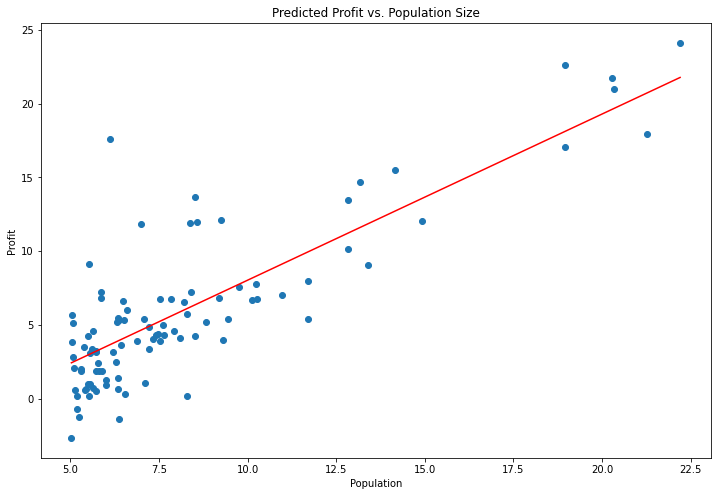

In [67]:
# 绘制线性模型以及数据，直观地看出它的拟合
# start:返回样本数据开始点; stop:返回样本数据结束点; num:生成的样本数据量，默认为50
# 返回的是 [start, stop]之间的均匀分布
x = np.linspace(data.Population.min(), data.Population.max(), num=100)
f = g[0, 0] + (g[0, 1] * x)  # 预测值

# fig代表绘图窗口；ax代表这个绘图窗口上的坐标系，一般会继续对ax进行操作
fig, ax = plt.subplots(figsize=(12,8))  # 此处没有子图
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)  # 在图上标明一个图例，位置为四象项中的第二象项，即左上角
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [68]:
# 求到最佳theta后，预测3w和6w人口城市的利润
predict1 = np.array([1,3]).dot(g.T)
predict2 = np.array([1,6]).dot(g.T)

# predict1 = np.power(np.array([1,3]) * g.T, 1)
# predict2 = np.power(np.array([1,6]) * g.T, 1) 同上
print("3w人口城市的利润为: ", predict1)
print("6w人口城市的利润为: ", predict2)

3w人口城市的利润为:  [[0.14048046]]
6w人口城市的利润为:  [[3.52236307]]
